In [17]:
from hipscat.pixel_tree.pixel_alignment import align_trees
from hipscat.pixel_tree.pixel_tree import PixelTree
import numpy as np
from hipscat.catalog import Catalog
from hipscat import inspection

agn_path="/data3/epyc/data3/hipscat/catalogs/dr16q_constant/"
agn_catalog = Catalog.read_from_hipscat(agn_path)

In [19]:
from hipscat.pixel_tree.pixel_node import PixelNode
from hipscat.pixel_math import HealpixPixel

max_depth = agn_catalog.partition_info.get_highest_order()

missing_pixels = []

def _find_missing_rec(curr_node, missing_pixels, max_depth):
    child_max = PixelNode._NODE_TYPE_MAX_CHILDREN[curr_node.node_type]
    child_order = curr_node.pixel.order + 1
    if len(curr_node.children) != child_max:
        child_pixels = [
            child.pixel.pixel
            for child in curr_node.children
        ]

        range_start = curr_node.pixel.pixel * 4
        for pix_num in range(range_start, range_start + child_max):
            if pix_num not in child_pixels:
                missing_pixels.append(HealpixPixel(child_order, pix_num))

    if child_order != max_depth:
        for child in curr_node.children:
            _find_missing_rec(curr_node=child, missing_pixels=missing_pixels, max_depth=max_depth)


curr_node = agn_catalog.pixel_tree.root_pixel
_find_missing_rec(curr_node=curr_node, missing_pixels=missing_pixels,max_depth=max_depth)

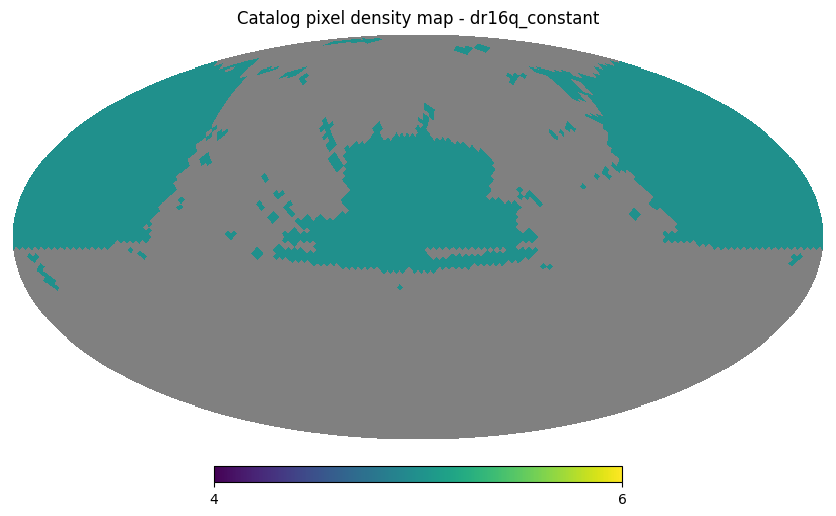

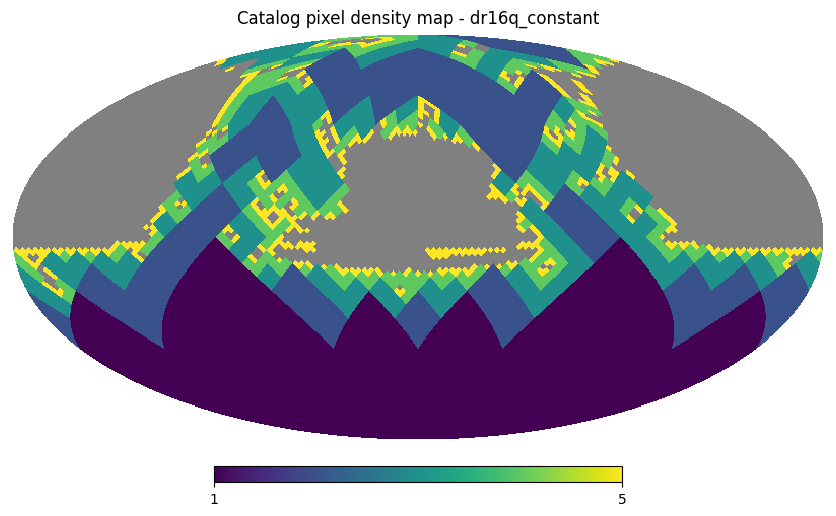

In [20]:
inspection.plot_pixels(agn_catalog)

negative_catalog = Catalog(agn_catalog.catalog_info, missing_pixels)
inspection.plot_pixels(negative_catalog)